In [4]:
#mnist 분류
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [5]:
tf.set_random_seed(777)
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)
#one_hot 원핫 인코딩 상태로

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [25]:
x=tf.placeholder(tf.float32,[None,784])
y=tf.placeholder(tf.float32,[None,10])

In [26]:
w=tf.Variable(tf.random_normal([784,10]))
b=tf.Variable(tf.random_normal([10]))

In [27]:
hf=tf.nn.softmax(tf.matmul(x,w)+b)

In [28]:
cost=tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf),axis=1))
train= tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [29]:
isCorrect=tf.equal(tf.argmax(hf,1),tf.argmax(y,1))

In [30]:
accuracy=tf.reduce_mean(tf.cast(isCorrect,tf.float32))

In [40]:
numEpochs=15
batchSize=100
numIter = int(mnist.train.num_examples/batchSize)
# 60000 / 100 = 600

에폭:0001, cost:2.785632732
에폭:0002, cost:1.108958920
에폭:0003, cost:0.883038990
에폭:0004, cost:0.771663821
에폭:0005, cost:0.703109534
에폭:0006, cost:0.652969799
에폭:0007, cost:0.615393525
에폭:0008, cost:0.585987460
에폭:0009, cost:0.561219451
에폭:0010, cost:0.540234084
에폭:0011, cost:0.522381218
에폭:0012, cost:0.506761632
에폭:0013, cost:0.493253635
에폭:0014, cost:0.480946563
에폭:0015, cost:0.469640679
정확도: 0.8874
레이블: [7]
예측: [7]


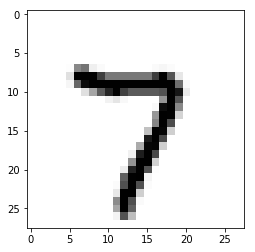

In [56]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #트레이닝
    for epoch in range(numEpochs):#15에폭
        avgCv=0
        for i in range(numIter):#600
            batchX,batchY=mnist.train.next_batch(batchSize)
            _,cv=sess.run([train,cost],feed_dict={x:batchX,y:batchY})
            avgCv+=cv/numIter
        print("에폭:{:04d}, cost:{:.9f}".format(epoch+1,avgCv))
    print("정확도:",accuracy.eval(session=sess,feed_dict={x:mnist.test.images,y:mnist.test.labels}))
    
    r=random.randint(0,mnist.test.num_examples-1)
    print("레이블:",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("예측:",sess.run(tf.argmax(hf,1),feed_dict={x:mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap='Greys')
    plt.show()

In [57]:
## 학습 모델 저장/불러오기 (케라스 버전으로 해보기)

In [58]:
# 다층퍼셉트론 모델
# 훈련셋, 검증셋, 시험셋

In [59]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation
import numpy as np

In [60]:
(xTrain,yTrain),(xTest,yTest)=mnist.load_data()

In [62]:
#전처리
xTrain=xTrain.reshape(60000,784).astype('float32')/255.0
xTest=xTest.reshape(10000,784).astype('float32')/255.0

In [63]:
yTrain.shape

(60000,)

In [64]:
yTest.shape

(10000,)

In [65]:
yTrain=np_utils.to_categorical(yTrain)#원 핫 인코딩
yTrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [66]:
yTest=np_utils.to_categorical(yTest)
yTest

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [67]:
xVal=xTrain[42000:]
xTrain=xTrain[:42000]
yVal=yTrain[42000:]
yTrain=yTrain[:42000]

In [68]:
xTrain.shape

(42000, 784)

In [69]:
#모델 구성
model=Sequential()
model.add(Dense(units=64,input_dim=28*28,activation="relu"))
#Dense : 히든 레이어 추가, units:노드개수
model.add(Dense(units=10,activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [70]:
#학습 환경 설정(compile)
model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
#학습(fit)
model.fit(xTrain,yTrain,epochs=5,batch_size=50,validation_data=(xVal,yVal))

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 1s 30us/step - loss: 0.9304 - accuracy: 0.7659 - val_loss: 0.4961 - val_accuracy: 0.8731
Epoch 2/5
42000/42000 [==============================] - 1s 27us/step - loss: 0.4394 - accuracy: 0.8837 - val_loss: 0.3825 - val_accuracy: 0.8952
Epoch 3/5
42000/42000 [==============================] - 1s 27us/step - loss: 0.3658 - accuracy: 0.8989 - val_loss: 0.3401 - val_accuracy: 0.9048
Epoch 4/5
42000/42000 [==============================] - 1s 28us/step - loss: 0.3301 - accuracy: 0.9078 - val_loss: 0.3150 - val_accuracy: 0.9107
Epoch 5/5
42000/42000 [==============================] - 1s 26us/step - loss: 0.3065 - accuracy: 0.9135 - val_loss: 0.2985 - val_accuracy: 0.9164


In [71]:
#모델 평가하기(test data)
metrics=model.evaluate(xTest,yTest,batch_size=50)
print("평가결과:"+str(metrics))

10000/10000 [==============================] - 0s 14us/step
평가결과:[0.2872369504254311, 0.9189000129699707]


In [76]:
idx=np.random.choice(xTest.shape[0],5)
xHat=xTest[idx]
yHat=model.predict_classes(xHat)

In [80]:
xHat  # 5,784
yHat  # 예측값

array([1, 0, 9, 1, 2], dtype=int64)

In [91]:
#print("예측값:",yHat)#예측값
for i in range(5):
    print("예측값 : "+str(yHat[i])+"  실제값 : "+str(np.argmax(yTest[idx[i]])))

예측값 : 1  실제값 : 9
예측값 : 0  실제값 : 0
예측값 : 9  실제값 : 9
예측값 : 1  실제값 : 1
예측값 : 2  실제값 : 2


In [92]:
"""
모델 : 모델 아키텍처와 모델 가중치로 구성
모델 아키텍처 : 모델이 어떤 층으로 구성
모델 가중치 : weight, bias

save():케라스 모델 저장 함수(아키텍처+가중치)
파일형식 : "h5"로 저장
"""
model.save("mnist_model.h5")

In [20]:
# #모델 아키텍쳐 확인
# from keras.utils.vis_utils import model_to_dot
# from IPython.display import SVG
# SVG(model_to_dot(model,show_shapes=True).create(prog="dot",format="svg"))

In [97]:
# !pip install pydot

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [103]:
# 실제 데이터 사용
(xTrain,yTrain),(xTest,yTest)=mnist.load_data()
xTest=xTest.reshape(10000,784).astype('float32')
yTest=np_utils.to_categorical(yTest)
idx=np.random.choice(xTest.shape[0],10)
xhat=xTest[idx]

# 모델 불러오기
from keras.models import load_model
model=load_model("mnist_model.h5")
yhat=model.predict_classes(xhat)#시퀀설 api에서만 사용되는 함수
for i in range(10):
    print("예측값 : "+str(yhat[i])+"  실제값 : "+str(np.argmax(yTest[idx[i]])))

예측값 : 1  실제값 : 1
예측값 : 9  실제값 : 9
예측값 : 7  실제값 : 7
예측값 : 1  실제값 : 2
예측값 : 1  실제값 : 1
예측값 : 6  실제값 : 6
예측값 : 0  실제값 : 0
예측값 : 8  실제값 : 8
예측값 : 8  실제값 : 8
예측값 : 0  실제값 : 0


In [104]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

In [105]:
xdata=xy[:,0:-1]
ydata=xy[:,[-1]]

In [118]:
x=tf.placeholder(tf.float32,shape=[None,4])
y=tf.placeholder(tf.float32,shape=[None,1])

In [119]:
w=tf.Variable(tf.random_normal([4,1]))
b=tf.Variable(tf.random_normal([1]))

In [120]:
hf=tf.matmul(x,w)+b

In [121]:
cost=tf.reduce_mean(tf.square(hf-y))

In [122]:
train=tf.train.GradientDescentOptimizer(1e-5).minimize(cost)

In [123]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [124]:
for step in range(101):
    cv,hv,_=sess.run([cost,hf,train],feed_dict={x:xdata,y:ydata})
    print(step,"cost:",cv,"\nPrediction:",hv)
# nan이 나옴 발산 이유: 스케일링 안했음, 러닝레이트 조절 필요

0 cost: 1.8146178 
Prediction: [[-0.6963668 ]
 [-0.9691154 ]
 [-0.8520859 ]
 [-0.7320697 ]
 [-0.7734653 ]
 [-0.78456485]
 [-0.7523502 ]
 [-0.87549746]]
1 cost: 1.8144796 
Prediction: [[-0.6962987 ]
 [-0.969049  ]
 [-0.85203046]
 [-0.73202664]
 [-0.7734145 ]
 [-0.78451574]
 [-0.752317  ]
 [-0.8754646 ]]
2 cost: 1.8143411 
Prediction: [[-0.6962307 ]
 [-0.9689825 ]
 [-0.851975  ]
 [-0.73198366]
 [-0.77336365]
 [-0.7844666 ]
 [-0.7522838 ]
 [-0.87543184]]
3 cost: 1.8142029 
Prediction: [[-0.6961627 ]
 [-0.96891606]
 [-0.8519196 ]
 [-0.7319407 ]
 [-0.77331287]
 [-0.7844175 ]
 [-0.75225055]
 [-0.875399  ]]
4 cost: 1.8140645 
Prediction: [[-0.6960947 ]
 [-0.9688496 ]
 [-0.85186416]
 [-0.7318977 ]
 [-0.773262  ]
 [-0.7843684 ]
 [-0.75221735]
 [-0.8753662 ]]
5 cost: 1.8139262 
Prediction: [[-0.6960267 ]
 [-0.96878314]
 [-0.8518088 ]
 [-0.73185474]
 [-0.77321124]
 [-0.7843193 ]
 [-0.7521841 ]
 [-0.8753334 ]]
6 cost: 1.8137879 
Prediction: [[-0.6959587 ]
 [-0.9687167 ]
 [-0.85175335]
 [-0.7318117

In [113]:
xy.shape #8,5

(8, 5)

In [116]:
def myMinMax(data):#스케일링
    #print(np.min(data))#전체에서 최소값
    print(np.min(data,axis=1))#행 단위로 최소값
    print(np.min(data,axis=0))#열 단위로 최소값
    bj=data-np.min(data,0)
    bm=np.max(data,0)-np.min(data,0)
    
    return bj/bm

print(myMinMax(xy))
xy=myMinMax(xy)

[828.349976 821.655029 818.97998  815.48999  818.469971 816.
 809.780029 804.539978]
[8.09510010e+02 8.15250000e+02 9.08100000e+05 8.04539978e+02
 8.09559998e+02]
[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]
[828.349976 821.655029 818.97998  815.48999  818.469971 816.
 809.780029 804.539978]
[8.09510010e+02 8.15250000e+02 9.08100000e+05 8.04539978e+02
 8.09559998e+02]


In [117]:
xdata=xy[:,0:-1]
ydata=xy[:,[-1]]

In [125]:
x=tf.placeholder(tf.float32,shape=[None,4])
y=tf.placeholder(tf.float32,shape=[None,1])
w=tf.Variable(tf.random_normal([4,1]))
b=tf.Variable(tf.random_normal([1]))
hf=tf.matmul(x,w)+b
cost=tf.reduce_mean(tf.square(hf-y))
train=tf.train.GradientDescentOptimizer(1e-5).minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(101):
    cv,hv,_=sess.run([cost,hf,train],feed_dict={x:xdata,y:ydata})
    print(step,"cost:",cv,"\nPrediction:",hv)

0 cost: 1.090435 
Prediction: [[ 0.17870349]
 [-0.44503957]
 [-0.55049753]
 [-0.6674424 ]
 [-0.5253503 ]
 [-0.40271533]
 [-0.92844045]
 [-0.8750486 ]]
1 cost: 1.0903575 
Prediction: [[ 0.17875296]
 [-0.4449901 ]
 [-0.550456  ]
 [-0.66741   ]
 [-0.5253124 ]
 [-0.40267843]
 [-0.9284147 ]
 [-0.87502277]]
2 cost: 1.0902798 
Prediction: [[ 0.17880243]
 [-0.4449405 ]
 [-0.55041456]
 [-0.66737765]
 [-0.5252742 ]
 [-0.40264153]
 [-0.9283889 ]
 [-0.874997  ]]
3 cost: 1.0902021 
Prediction: [[ 0.1788519 ]
 [-0.44489092]
 [-0.55037296]
 [-0.6673453 ]
 [-0.52523637]
 [-0.40260482]
 [-0.92836314]
 [-0.87497115]]
4 cost: 1.0901245 
Prediction: [[ 0.17890137]
 [-0.44484156]
 [-0.55033165]
 [-0.667313  ]
 [-0.5251983 ]
 [-0.40256792]
 [-0.92833734]
 [-0.8749454 ]]
5 cost: 1.0900469 
Prediction: [[ 0.17895085]
 [-0.44479185]
 [-0.5502901 ]
 [-0.66728055]
 [-0.5251603 ]
 [-0.40253115]
 [-0.92831165]
 [-0.8749196 ]]
6 cost: 1.0899693 
Prediction: [[ 0.17900032]
 [-0.44474238]
 [-0.5502487 ]
 [-0.66724825

In [126]:
# 1. 역정규화를 하여 예측 종가를 출력
# 1.874 => xxxx???

In [127]:
#xor 문제를 텐서플로우로 구현
#단일, 멀티 퍼셉트론 각각 구현
xdata=np.array([[0,0],[0,1],[1,0],[1,1]])
ydata=np.array([[0],[1],[1],[0]])
# 트레이닝 횟수:10000번, lr=0.1
# 예측값 출력
# 0 0 => 0
# 0 1 => 1
# 1 0 => 1
# 1 1 => 0
# 정확도 : 0.5

In [128]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

w = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

hf= tf.sigmoid(tf.matmul(x, w) + b)

cost = -tf.reduce_mean(y * tf.log(hf) + (1 - y) * tf.log(1 - hf))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hf > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cv, wv = sess.run(
                  [train, cost, w], feed_dict={x: xdata, y: ydata}
        )
        if step % 100 == 0:
            print(step, cv, wv)

    h, c, a = sess.run([hf, predicted, accuracy], feed_dict={x: xdata, y: ydata})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


0 0.73524857 [[ 0.32425666]
 [-1.1088713 ]]
100 0.7074283 [[ 0.12265294]
 [-0.65509087]]
200 0.698089 [[ 0.02840341]
 [-0.38907412]]
300 0.69493634 [[-0.01022039]
 [-0.23356162]]
400 0.6938289 [[-0.02263622]
 [-0.1419994 ]]
500 0.6934196 [[-0.02368738]
 [-0.08746116]]
600 0.6932603 [[-0.02047918]
 [-0.05454937]]
700 0.6931956 [[-0.01622137]
 [-0.03442234]]
800 0.69316834 [[-0.01223005]
 [-0.02195329]]
900 0.6931566 [[-0.00893921]
 [-0.0141335 ]]
1000 0.6931514 [[-0.00639923]
 [-0.00917408]]
1100 0.6931491 [[-0.00451455]
 [-0.00599691]]
1200 0.69314814 [[-0.00315148]
 [-0.00394337]]
1300 0.6931476 [[-0.00218287]
 [-0.00260591]]
1400 0.6931474 [[-0.00150312]
 [-0.00172913]]
1500 0.6931473 [[-0.00103045]
 [-0.0011512 ]]
1600 0.69314724 [[-0.00070403]
 [-0.00076855]]
1700 0.6931472 [[-0.00047973]
 [-0.0005142 ]]
1800 0.6931471 [[-0.00032619]
 [-0.00034461]]
1900 0.6931472 [[-0.00022149]
 [-0.00023133]]
2000 0.6931472 [[-0.00015019]
 [-0.00015545]]
2100 0.6931471 [[-0.00010174]
 [-0.0001045

In [134]:
#멀티레이어 퍼셉트론 기반 신경망
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

# 1 히든 레이어
w1 = tf.Variable(tf.random_normal([2, 10]))
b1 = tf.Variable(tf.random_normal([10]))
layer1=tf.sigmoid(tf.matmul(x, w1) + b1)
#tf.nn.relu
# 1 히든 레이어
w2 = tf.Variable(tf.random_normal([10, 10]))
b2 = tf.Variable(tf.random_normal([10]))
layer2=tf.sigmoid(tf.matmul(layer1, w2) + b2)
# 1 히든 레이어
w3 = tf.Variable(tf.random_normal([10, 10]))
b3 = tf.Variable(tf.random_normal([10]))
layer3=tf.sigmoid(tf.matmul(layer2, w3) + b3)
# 1 히든 레이어
w4 = tf.Variable(tf.random_normal([10, 1]))
b4 = tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(layer3, w4) + b4)

cost = -tf.reduce_mean(y * tf.log(hf) + (1 - y) * tf.log(1 - hf))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hf > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cv, wv = sess.run(
                  [train, cost, w], feed_dict={x: xdata, y: ydata}
        )
        if step % 100 == 0:
            print(step, cv, wv)

    h, p, a = sess.run([hf, predicted, accuracy], feed_dict={x: xdata, y: ydata})
    print("\nhf: ", h, "\nPredicted: ", p, "\nAccuracy: ", a)


0 0.76505166 [[ 0.3270217]
 [-1.1147352]]
100 0.6899203 [[ 0.3270217]
 [-1.1147352]]
200 0.68658674 [[ 0.3270217]
 [-1.1147352]]
300 0.6828558 [[ 0.3270217]
 [-1.1147352]]
400 0.678461 [[ 0.3270217]
 [-1.1147352]]
500 0.6731149 [[ 0.3270217]
 [-1.1147352]]
600 0.66649354 [[ 0.3270217]
 [-1.1147352]]
700 0.65819484 [[ 0.3270217]
 [-1.1147352]]
800 0.64765024 [[ 0.3270217]
 [-1.1147352]]
900 0.6339992 [[ 0.3270217]
 [-1.1147352]]
1000 0.6159308 [[ 0.3270217]
 [-1.1147352]]
1100 0.5914483 [[ 0.3270217]
 [-1.1147352]]
1200 0.5573642 [[ 0.3270217]
 [-1.1147352]]
1300 0.50799274 [[ 0.3270217]
 [-1.1147352]]
1400 0.43348467 [[ 0.3270217]
 [-1.1147352]]
1500 0.32723364 [[ 0.3270217]
 [-1.1147352]]
1600 0.21200585 [[ 0.3270217]
 [-1.1147352]]
1700 0.12805331 [[ 0.3270217]
 [-1.1147352]]
1800 0.08026823 [[ 0.3270217]
 [-1.1147352]]
1900 0.05415555 [[ 0.3270217]
 [-1.1147352]]
2000 0.039114125 [[ 0.3270217]
 [-1.1147352]]
2100 0.029817112 [[ 0.3270217]
 [-1.1147352]]
2200 0.023690432 [[ 0.3270217

In [135]:
## sigmoid 대신 relu로 성능 더욱 높임

#멀티레이어 퍼셉트론 기반 신경망
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

# 1 히든 레이어
w1 = tf.Variable(tf.random_normal([2, 10]))
b1 = tf.Variable(tf.random_normal([10]))
layer1=tf.nn.relu(tf.matmul(x, w1) + b1)
#tf.nn.relu
# 1 히든 레이어
w2 = tf.Variable(tf.random_normal([10, 10]))
b2 = tf.Variable(tf.random_normal([10]))
layer2=tf.nn.relu(tf.matmul(layer1, w2) + b2)
# 1 히든 레이어
w3 = tf.Variable(tf.random_normal([10, 10]))
b3 = tf.Variable(tf.random_normal([10]))
layer3=tf.nn.relu(tf.matmul(layer2, w3) + b3)
# 1 히든 레이어
w4 = tf.Variable(tf.random_normal([10, 1]))
b4 = tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(layer3, w4) + b4)

cost = -tf.reduce_mean(y * tf.log(hf) + (1 - y) * tf.log(1 - hf))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hf > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cv, wv = sess.run(
                  [train, cost, w], feed_dict={x: xdata, y: ydata}
        )
        if step % 100 == 0:
            print(step, cv, wv)

    h, p, a = sess.run([hf, predicted, accuracy], feed_dict={x: xdata, y: ydata})
    print("\nhf: ", h, "\nPredicted: ", p, "\nAccuracy: ", a)


0 6.568432 [[ 0.3270217]
 [-1.1147352]]
100 0.010287397 [[ 0.3270217]
 [-1.1147352]]
200 0.0047109667 [[ 0.3270217]
 [-1.1147352]]
300 0.0030572098 [[ 0.3270217]
 [-1.1147352]]
400 0.0022226328 [[ 0.3270217]
 [-1.1147352]]
500 0.0017310028 [[ 0.3270217]
 [-1.1147352]]
600 0.0014210853 [[ 0.3270217]
 [-1.1147352]]
700 0.0012017702 [[ 0.3270217]
 [-1.1147352]]
800 0.0010399966 [[ 0.3270217]
 [-1.1147352]]
900 0.00091098447 [[ 0.3270217]
 [-1.1147352]]
1000 0.000813481 [[ 0.3270217]
 [-1.1147352]]
1100 0.00072869554 [[ 0.3270217]
 [-1.1147352]]
1200 0.0006614788 [[ 0.3270217]
 [-1.1147352]]
1300 0.0006058608 [[ 0.3270217]
 [-1.1147352]]
1400 0.0005593161 [[ 0.3270217]
 [-1.1147352]]
1500 0.000517088 [[ 0.3270217]
 [-1.1147352]]
1600 0.00048147002 [[ 0.3270217]
 [-1.1147352]]
1700 0.00044952217 [[ 0.3270217]
 [-1.1147352]]
1800 0.00042202085 [[ 0.3270217]
 [-1.1147352]]
1900 0.00039745853 [[ 0.3270217]
 [-1.1147352]]
2000 0.00037568592 [[ 0.3270217]
 [-1.1147352]]
2100 0.00035567395 [[ 0.3

In [136]:
# keras.io
# Dense검색
#Dense(8, input_dim=4, init='uniform', activation='relu')
#Dense(1, input_dim=3, activation='sigmoid')
#Dense(10,input_dim=4, activation='softmax')
#...

# model=Sequential()
# model.add(Dense(8, input_dim=4, init='uniform', activation='relu'))
# model.add(Dense(1, input_dim=3, activation='sigmoid'))
# model.add(Dense(10,input_dim=4, activation='softmax'))


In [137]:
#1.Tensorflow를 사용해서 MNist 정확도 90%이상 만들기

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
print(tf.__version__)

1.15.0


C:\Users\student\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


EPOCH:0001,cost:18.617336909
EPOCH:0011,cost:7.075876077
EPOCH:0021,cost:6.163471540
EPOCH:0031,cost:4.183385372
EPOCH:0041,cost:3.779868046
EPOCH:0051,cost:3.673891822
EPOCH:0061,cost:3.504134178
EPOCH:0071,cost:3.496534824
EPOCH:0081,cost:3.250040968
EPOCH:0091,cost:3.215356549
EPOCH:0101,cost:3.142929633
EPOCH:0111,cost:3.084005674
EPOCH:0121,cost:3.138709903
EPOCH:0131,cost:3.024947762
EPOCH:0141,cost:1.042013347
EPOCH:0151,cost:0.498396819
EPOCH:0161,cost:0.637709295
EPOCH:0171,cost:0.409083565
EPOCH:0181,cost:0.367154737
EPOCH:0191,cost:0.364909614
EPOCH:0201,cost:0.324875096
EPOCH:0211,cost:0.303006788
EPOCH:0221,cost:0.286211438
EPOCH:0231,cost:0.275888279
EPOCH:0241,cost:0.254481989
EPOCH:0251,cost:0.239760265
EPOCH:0261,cost:1.310800006
EPOCH:0271,cost:0.226105176
EPOCH:0281,cost:0.208027733
EPOCH:0291,cost:0.198665502
EPOCH:0301,cost:0.196900720
EPOCH:0311,cost:0.181967713
EPOCH:0321,cost:0.174427892
EPOCH:0331,cost:0.248184932
EPOCH:0341,cost:0.177090307
EPOCH:0351,cost:0.1

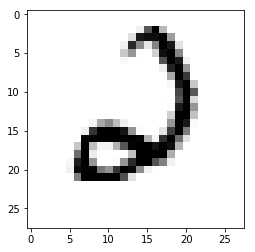

In [19]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000,28*28).astype('float32')/255
x_test=x_test.reshape(10000,28*28).astype('float32')/255

oht = OneHotEncoder()
y_train =oht.fit_transform(y_train.reshape(-1,1)).toarray()#-1은 알아서 사이즈 맞춰줌
y_test=oht.transform(y_test.reshape(-1,1)).toarray()

X=tf.placeholder(tf.float32,[None,28*28])
Y=tf.placeholder(tf.float32,[None,10])

W1=tf.Variable(tf.random_normal([28*28,100]))
b1=tf.Variable(tf.random_normal([100]))
layer1=tf.nn.relu(tf.matmul(X,W1)+b1)

W2=tf.Variable(tf.random_normal([100,10]))
b2=tf.Variable(tf.random_normal([10]))
hf=tf.nn.softmax(tf.matmul(layer1,W2)+b2)

cost=tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hf+1e-10),axis=1))
train=tf.train.GradientDescentOptimizer(1).minimize(cost)
isCorrect=tf.equal(tf.argmax(hf,axis=1),tf.argmax(Y,axis=1))
accuracy=tf.reduce_mean(tf.cast(isCorrect,tf.float32))

numEpochs=500
batchSize=10000
numIter=x_train.shape[0]//batchSize#6

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(numEpochs):
        avgCv=0
        for i in range(numIter):
            batchX=x_train[batchSize*i:batchSize*(i+1)]
            batchY=y_train[batchSize*i:batchSize*(i+1)]
            _,hfv,cv=sess.run([train,hf,cost],feed_dict={X:batchX,Y:batchY})
            avgCv+=cv/numIter
        if epoch%10==0:
            print("EPOCH:{:04d},cost:{:.9f}".format(epoch+1,avgCv))
    print("정확도:",sess.run(accuracy,feed_dict={X:x_test,Y:y_test}))
    print("정확도:",accuracy.eval(session=sess,feed_dict={X:x_test,Y:y_test}))
    r=np.random.randint(0,len(y_test)-1)
    print("레이블:",sess.run(tf.argmax(y_test[r:r+1],1)))
    print("예측:",sess.run(tf.argmax(hf,1),feed_dict={X:x_test[r:r+1]}))
    
    plt.imshow(x_test[r:r+1].reshape(28,28),cmap='Greys')
    plt.show()
    sess.close()

In [13]:
numIter

6

In [36]:
## pima-indian 데이터

In [57]:
path=r"C:\Users\student\Downloads\Python_JP\dataset (1)"
file_="\pima-indians-diabetes.csv"
df=pd.read_csv(path+file_,header=None)

In [58]:
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [59]:
xdata=df.iloc[:,:-1]
ydata=np.array(df.iloc[:,[-1]])

In [85]:
from sklearn.preprocessing import StandardScaler
xdata=StandardScaler().fit_transform(xdata)
print(xdata.shape,ydata.shape)#(768,8)(768,1)
X=tf.placeholder(tf.float32, shape=[None,8])
Y=tf.placeholder(tf.float32,shape=[None,1])

W1=tf.Variable(tf.random_normal(shape=[8,200]))
b1=tf.Variable(tf.random_normal(shape=[200]))
layer1=tf.nn.relu(tf.matmul(X,W1)+b1)

W2=tf.Variable(tf.random_normal(shape=[200,1]))
b2=tf.Variable(tf.random_normal(shape=[1]))
hf=tf.sigmoid(tf.matmul(layer1,W2)+b2)

loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=hf,labels=Y))
train=tf.train.GradientDescentOptimizer(1).minimize(loss)
pred=tf.cast(hf>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(pred,Y),tf.float32))

epochs= 1000
batch_size=100
iter_num=len(xdata)//batch_size # 7

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    idx=np.random.choice(xdata.shape[0],xdata.shape[0])
    for epoch in range(epochs):
        avg_lv=0
        for i in range(iter_num):
            _,hv,lv=sess.run([train,hf,loss],
                            feed_dict={X:xdata[idx[:batch_size*(i+1)]],Y:ydata[idx[:batch_size*(i+1)]]})
            avg_lv+=lv/iter_num
        if epoch%100==0:
            print(epoch,avg_lv)
    pred_,acc_,hf_=sess.run([pred, accuracy, hf], feed_dict={X:xdata,Y:ydata})
    print(acc_)
    sess.close()

(768, 8) (768, 1)
0 0.8638515898159572
100 0.658131812300001
200 0.6422078354018075
300 0.6343628253255572
400 0.633097767829895
500 0.6327078597886222
600 0.6325233493532454
700 0.6324073416846139
800 0.6323026248386927
900 0.6317878620965139
0.7994792


In [44]:
xdata.shape

(768, 8)

In [64]:
idx=np.random.choice(xdata.shape[0],xdata.shape[0])

In [78]:
tt=list(idx[:batch_size*1])

In [79]:
xdata[tt]

array([[ 1.82781311e+00, -6.22642036e-01,  8.73409251e-01,
         1.03272605e+00, -6.92890572e-01,  1.72704372e+00,
         2.00573238e+00,  4.04942367e-01],
       [-8.44885053e-01,  2.13150675e+00, -4.70732246e-01,
         1.54533192e-01,  6.65283938e+00, -2.40204587e-01,
        -2.23115200e-01,  2.19178518e+00],
       [-8.44885053e-01,  2.22380888e-01,  6.66618252e-01,
        -2.21835174e-01,  8.96079382e-01, -5.70194625e-01,
        -1.07780879e+00, -9.56461683e-01],
       [ 3.42980797e-01,  9.71923068e-02,  2.53036252e-01,
        -1.28821221e+00, -6.92890572e-01,  2.54780469e-01,
        -7.60696324e-01,  4.04942367e-01],
       [-8.44885053e-01, -1.56155640e+00, -1.09110524e+00,
        -1.59107113e-01, -3.29904822e-02, -1.47132127e+00,
        -4.49624101e-01, -9.56461683e-01],
       [-2.50952128e-01,  1.56815814e+00,  1.49640753e-01,
         7.81813803e-01,  4.79300377e-01,  1.65936998e-01,
        -8.24118817e-01, -7.86286177e-01],
       [-8.44885053e-01,  2.256695

In [82]:
xdata[idx[:batch_size*i]]

array([[-8.44885053e-01, -3.09670582e-01,  1.28699125e+00, ...,
         1.02477375e-01, -6.24790984e-01,  1.00055664e+00],
       [ 4.60143347e-02, -8.10424908e-01, -2.63941247e-01, ...,
         9.41978774e-04, -9.38883326e-01, -1.90671905e-01],
       [-8.44885053e-01,  1.00480952e+00,  6.66618252e-01, ...,
         1.09244749e+00,  6.49699098e-01, -8.71373930e-01],
       ...,
       [ 6.39947260e-01, -3.72264873e-01, -4.70732246e-01, ...,
        -8.87492739e-01, -8.02977986e-01, -5.31022918e-01],
       [ 4.60143347e-02,  8.17026649e-01,  2.53036252e-01, ...,
         3.69007790e-01, -2.62376743e-01, -2.75759658e-01],
       [ 3.42980797e-01, -4.66156309e-01,  6.66618252e-01, ...,
         9.52836319e-01, -5.61368492e-01,  4.04942367e-01]])

In [84]:
ydata[idx[:batch_size*i]]

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    